## Objetivo
EL objetivo del proyecto es predecir el precio de cierre de una acción usando redes neuronales recurrentes. En este caso, se decidió el estudio de las acciones de Apple (AAPL) a través de YahooFinance exportando un dataset en formato csv.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
df.to_csv(f'{ticker}_stock.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635288,24.169168,23.448431,24.089086,257142000
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889896,24.947734,24.180281,24.298181,237458000
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


In [4]:
data = df[['Close']].values
data

array([[ 24.32043457],
       [ 23.63528824],
       [ 23.63751411],
       ...,
       [258.73550415],
       [255.30929565],
       [251.92301941]])

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
def create_sequences(dataset, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(dataset)):
        X.append(dataset[i-sequence_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

In [7]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(units=50),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0153 - val_loss: 0.0019
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0717e-04 - val_loss: 0.0010
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6586e-04 - val_loss: 0.0012
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8662e-04 - val_loss: 0.0015
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7509e-04 - val_loss: 0.0015
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4821e-04 - val_loss: 0.0013
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5033e-04 - val_loss: 9.7975e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6497e-04 - val_loss: 8.2770e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2415e-04 - val_loss: 0.0012
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0018e-04 - val_loss: 0.0017


In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


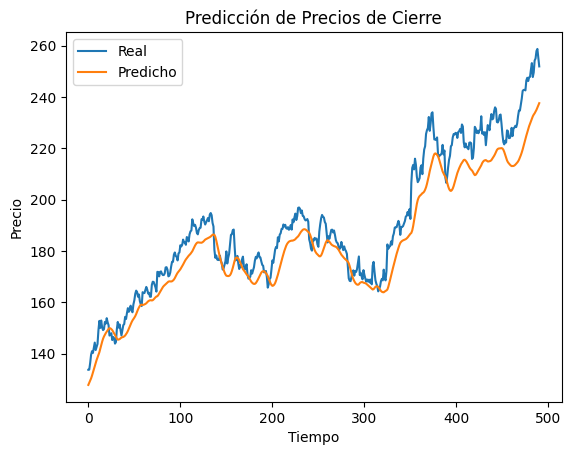

In [13]:
plt.plot(y_test_real, label='Real')
plt.plot(predictions, label='Predicho')
plt.legend()
plt.title('Predicción de Precios de Cierre')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.show()


## Justificación para el preyecto
Las redes neuronales recurrentes se portan bastante bien con datos secuenciales, por lo que el objetivo de este proyecto se pudo lograr de manera satisfactoria (Como se ve en los resultados)

Aunque las redes neuronales recurrentes son capaces de procesar datos secuenciales, sufren el problema del gradiente de desaparición, lo que hace que olviden información a largo plazo. Los LSTM resuelven este problema con una arquitectura interna más compleja, que incluye puertas de entrada, olvido y salida, lo que permite que la red almacene o descarte información de manera más eficiente.

Este proyecto utilizó una red LSTM de dos capas para capturar relaciones a corto y largo plazo en los precios de las acciones.

El optimizador controla cómo la red actualiza sus pesos durante el entrenamiento. Se ha probado el optimizador Adam, que combina las ventajas de otros métodos como RMSprop y Momentum.

Los datos se normalizaron utilizando MinMaxScaler para que todos los valores estuvieran entre 0 y 1 antes de entrenar el modelo. Esto mejora la estabilidad del entrenamiento y permite que el modelo aprenda de manera más eficiente.